In [79]:
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
%matplotlib inline
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series  
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")

In [80]:
train=pd.read_csv("Train_SU63ISt.csv") 
test=pd.read_csv("Test_0qrQsBZ.csv")

# train_set, test_set= np.split(data, [int(.67 *len(data))])

In [81]:
train_original=train.copy() 
test_original=test.copy()

In [82]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [83]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [84]:
train.shape, test.shape

((18288, 3), (5112, 2))

In [85]:
train.head(10)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
5,5,25-08-2012 05:00,2
6,6,25-08-2012 06:00,2
7,7,25-08-2012 07:00,2
8,8,25-08-2012 08:00,6
9,9,25-08-2012 09:00,2


In [86]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M') 
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [87]:
train["Datetime"].head(10)

0   2012-08-25 00:00:00
1   2012-08-25 01:00:00
2   2012-08-25 02:00:00
3   2012-08-25 03:00:00
4   2012-08-25 04:00:00
5   2012-08-25 05:00:00
6   2012-08-25 06:00:00
7   2012-08-25 07:00:00
8   2012-08-25 08:00:00
9   2012-08-25 09:00:00
Name: Datetime, dtype: datetime64[ns]

In [88]:
train.head(10)

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2
5,5,2012-08-25 05:00:00,2
6,6,2012-08-25 06:00:00,2
7,7,2012-08-25 07:00:00,2
8,8,2012-08-25 08:00:00,6
9,9,2012-08-25 09:00:00,2


In [89]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

In [90]:
i.head(10)

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4
5,5,2012-08-25 05:00:00,2,2012,8,25,5
6,6,2012-08-25 06:00:00,2,2012,8,25,6
7,7,2012-08-25 07:00:00,2,2012,8,25,7
8,8,2012-08-25 08:00:00,6,2012,8,25,8
9,9,2012-08-25 09:00:00,2,2012,8,25,9


In [91]:
train['day of week']=train['Datetime'].dt.dayofweek

In [92]:
train['day of week']

0        5
1        5
2        5
3        5
4        5
5        5
6        5
7        5
8        5
9        5
10       5
11       5
12       5
13       5
14       5
15       5
16       5
17       5
18       5
19       5
20       5
21       5
22       5
23       5
24       6
25       6
26       6
27       6
28       6
29       6
        ..
18258    2
18259    2
18260    2
18261    2
18262    2
18263    2
18264    3
18265    3
18266    3
18267    3
18268    3
18269    3
18270    3
18271    3
18272    3
18273    3
18274    3
18275    3
18276    3
18277    3
18278    3
18279    3
18280    3
18281    3
18282    3
18283    3
18284    3
18285    3
18286    3
18287    3
Name: day of week, Length: 18288, dtype: int64

In [94]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
    
# 0 is Monday and 6 is Sunday.

In [95]:
temp2 = train['Datetime'].apply(applyer)

In [96]:
train['weekend']=temp2

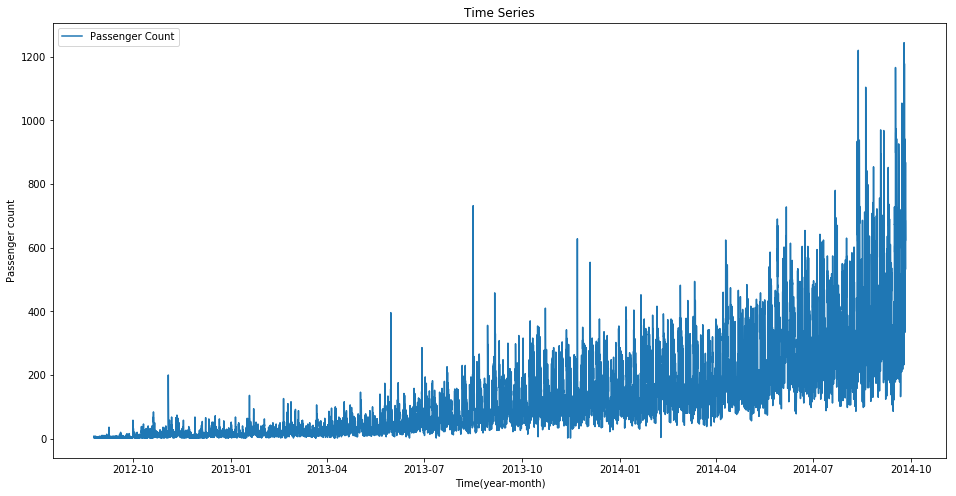

In [97]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis. 
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis. 
ts = df['Count'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

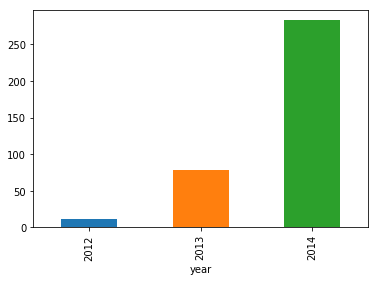

In [98]:
# Our first hypothesis was traffic will increase as the years pass by.
train.groupby('year')['Count'].mean().plot.bar()

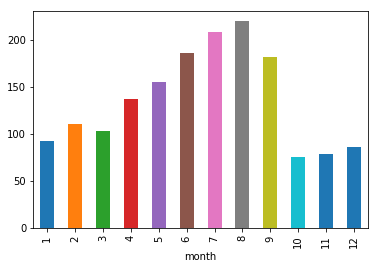

In [99]:
# second hypothesis was about increase in traffic from May to October
train.groupby('month')['Count'].mean().plot.bar()
# we see a decrease in the mean of passenger count in last three months.

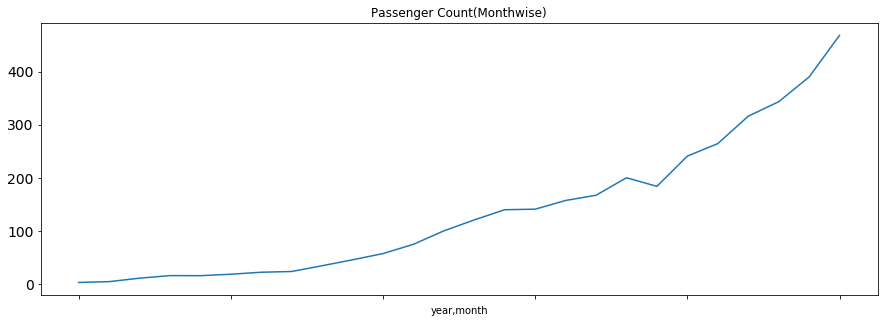

In [100]:
# monthly mean of each year separately.
temp=train.groupby(['year', 'month'])['Count'].mean() 
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

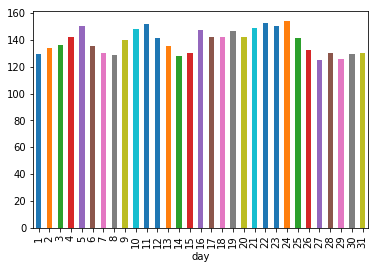

In [101]:
#  daily mean of passenger count.
train.groupby('day')['Count'].mean().plot.bar()
# We are not getting much insights from day wise count of the passengers.

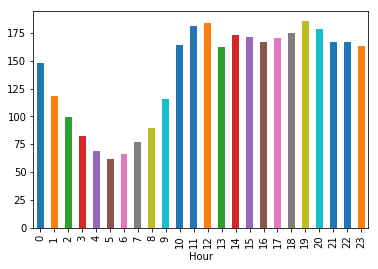

In [102]:
# We are not getting much insights from day wise count of the passengers.
# We also made a hypothesis that the traffic will be more during peak hours. 
# So let’s see the mean of hourly passenger count.
train.groupby('Hour')['Count'].mean().plot.bar()
# It can be inferred that the peak traffic is at 7 PM and then we see a decreasing trend till 5 AM.
# After that the passenger count starts increasing again and peaks again between 11AM and 12 Noon.

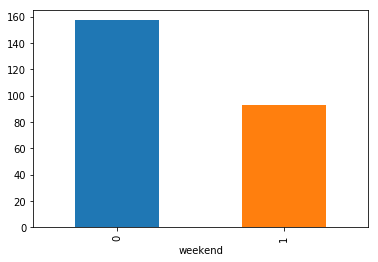

In [103]:
# try to validate our hypothesis in which we assumed that the traffic will be more on weekdays.

train.groupby('weekend')['Count'].mean().plot.bar()
# traffic is more on weekdays as compared to weekends

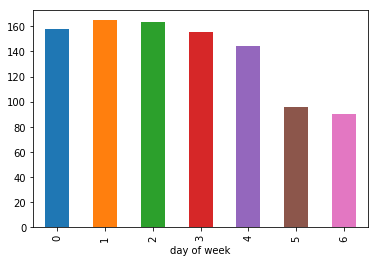

In [104]:
# we will try to look at the day wise passenger count.
# 0 is the starting of the week, i.e., 0 is Monday and 6 is Sunday.

train.groupby('day of week')['Count'].mean().plot.bar()

In [105]:
train.head(10)

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1
2012-08-25 05:00:00,5,2012-08-25 05:00:00,2,2012,8,25,5,5,1
2012-08-25 06:00:00,6,2012-08-25 06:00:00,2,2012,8,25,6,5,1
2012-08-25 07:00:00,7,2012-08-25 07:00:00,2,2012,8,25,7,5,1
2012-08-25 08:00:00,8,2012-08-25 08:00:00,6,2012,8,25,8,5,1


In [106]:
# Now we will look at basic modeling techniques. 
# Before that we will drop the ID variable as it has nothing to do with the passenger count.

train=train.drop('ID',1)

In [107]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [108]:
train.Timestamp

Datetime
2012-08-25 00:00:00   2012-08-25 00:00:00
2012-08-25 01:00:00   2012-08-25 01:00:00
2012-08-25 02:00:00   2012-08-25 02:00:00
2012-08-25 03:00:00   2012-08-25 03:00:00
2012-08-25 04:00:00   2012-08-25 04:00:00
2012-08-25 05:00:00   2012-08-25 05:00:00
2012-08-25 06:00:00   2012-08-25 06:00:00
2012-08-25 07:00:00   2012-08-25 07:00:00
2012-08-25 08:00:00   2012-08-25 08:00:00
2012-08-25 09:00:00   2012-08-25 09:00:00
2012-08-25 10:00:00   2012-08-25 10:00:00
2012-08-25 11:00:00   2012-08-25 11:00:00
2012-08-25 12:00:00   2012-08-25 12:00:00
2012-08-25 13:00:00   2012-08-25 13:00:00
2012-08-25 14:00:00   2012-08-25 14:00:00
2012-08-25 15:00:00   2012-08-25 15:00:00
2012-08-25 16:00:00   2012-08-25 16:00:00
2012-08-25 17:00:00   2012-08-25 17:00:00
2012-08-25 18:00:00   2012-08-25 18:00:00
2012-08-25 19:00:00   2012-08-25 19:00:00
2012-08-25 20:00:00   2012-08-25 20:00:00
2012-08-25 21:00:00   2012-08-25 21:00:00
2012-08-25 22:00:00   2012-08-25 22:00:00
2012-08-25 23:00:00   201

In [109]:
train.index = train.Timestamp

In [110]:
train.index

DatetimeIndex(['2012-08-25 00:00:00', '2012-08-25 01:00:00',
               '2012-08-25 02:00:00', '2012-08-25 03:00:00',
               '2012-08-25 04:00:00', '2012-08-25 05:00:00',
               '2012-08-25 06:00:00', '2012-08-25 07:00:00',
               '2012-08-25 08:00:00', '2012-08-25 09:00:00',
               ...
               '2014-09-25 14:00:00', '2014-09-25 15:00:00',
               '2014-09-25 16:00:00', '2014-09-25 17:00:00',
               '2014-09-25 18:00:00', '2014-09-25 19:00:00',
               '2014-09-25 20:00:00', '2014-09-25 21:00:00',
               '2014-09-25 22:00:00', '2014-09-25 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=18288, freq=None)

In [111]:
# Hourly time series 
hourly = train.resample('H').mean()

In [112]:
hourly

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2,2012,8,25,4,5,1
2012-08-25 05:00:00,2,2012,8,25,5,5,1
2012-08-25 06:00:00,2,2012,8,25,6,5,1
2012-08-25 07:00:00,2,2012,8,25,7,5,1
2012-08-25 08:00:00,6,2012,8,25,8,5,1


In [113]:
# Converting to daily mean 
daily = train.resample('D').mean() 

In [114]:
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()

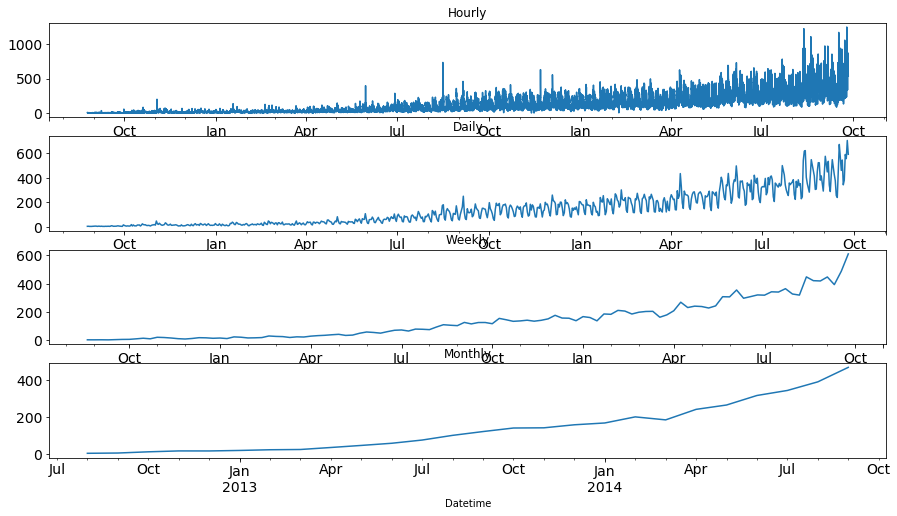

In [115]:
# Let’s look at the hourly, daily, weekly and monthly time series.

fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 

plt.show()

In [116]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [117]:
# Converting to daily mean 
test = test.resample('D').mean()

In [118]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Converting to daily mean 
train = train.resample('D').mean()

In [119]:
Train=train.ix['2012-08-25':'2014-06-24'] 
valid=train.ix['2014-06-25':'2014-09-25']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


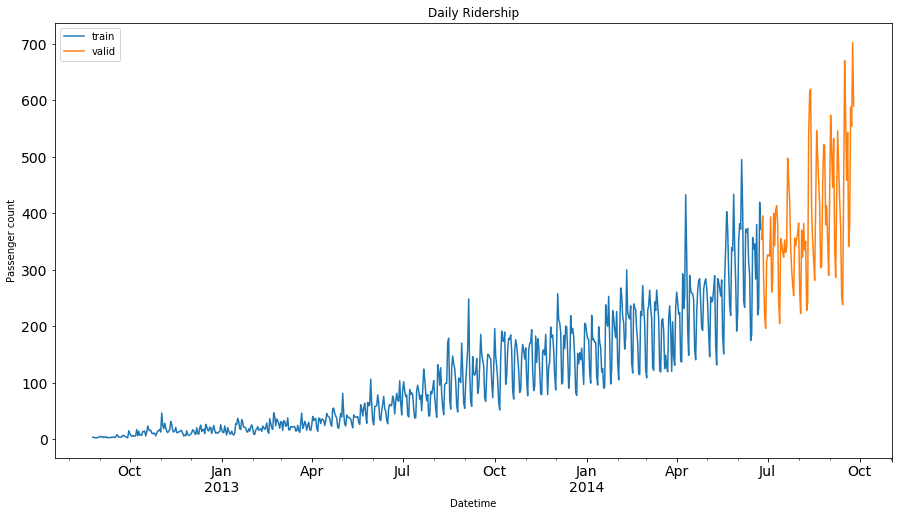

In [120]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()

In [121]:
# We will look at various models now to forecast the time series . 
# Methods which we will be discussing for the forecasting are:

# i) Naive Approach
# ii) Moving Average
# iii) Simple Exponential Smoothing
# iv) Holt’s Linear Trend Model

### Naive Approach

In [122]:
# In this forecasting technique, we assume that the next expected point is equal to the last observed point. 
# So we can expect a straight horizontal line as the prediction.

In [123]:
dd= np.asarray(Train.Count) 

In [124]:
dd.shape

(669,)

In [125]:
y_hat = valid.copy() 

In [126]:
y_hat['naive'] = dd[len(dd)-1]

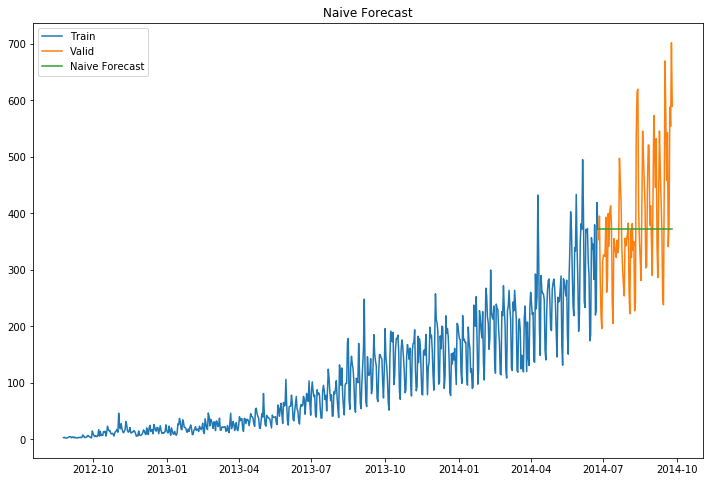

In [127]:
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Count'], label='Train') 
plt.plot(valid.index,valid['Count'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [128]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive)) 
print(rms)
# We can infer that this method is not suitable for datasets with high variability. 
# We can reduce the rmse value by adopting different techniques.

111.79050467496724


### Moving Average

In [129]:
# we will take the average of the passenger counts for last few time periods only.

In [130]:
y_hat_avg = valid.copy()

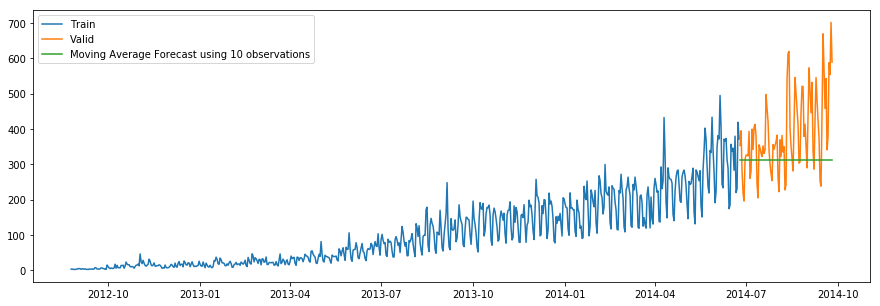

In [131]:
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 

In [132]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)

134.23733308950264


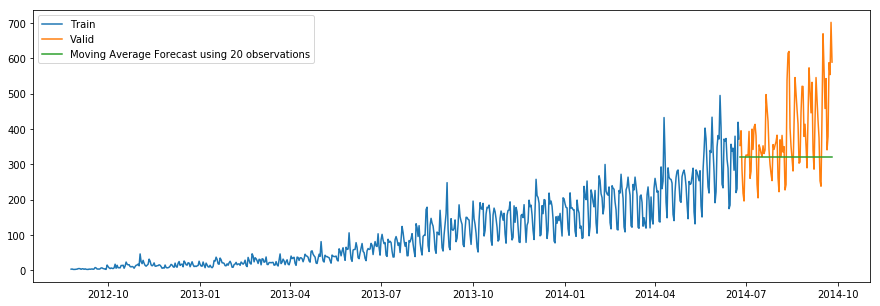

In [133]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show() 

In [134]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)

130.44984977550422


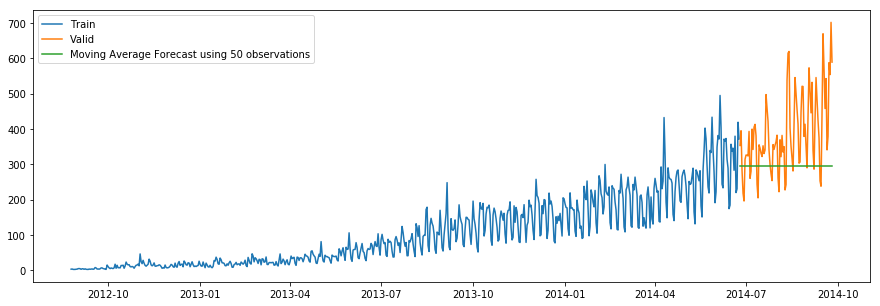

In [135]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [136]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)

144.19175679986802


### Simple Exponential Smoothing

In [137]:
# In this technique, we assign larger weights to more recent observations than to observations from the distant past.
# The weights decrease exponentially as observations come from further in the past, 
# the smallest weights are associated with the oldest observations.

In [138]:
from scipy.special import logsumexp

In [139]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

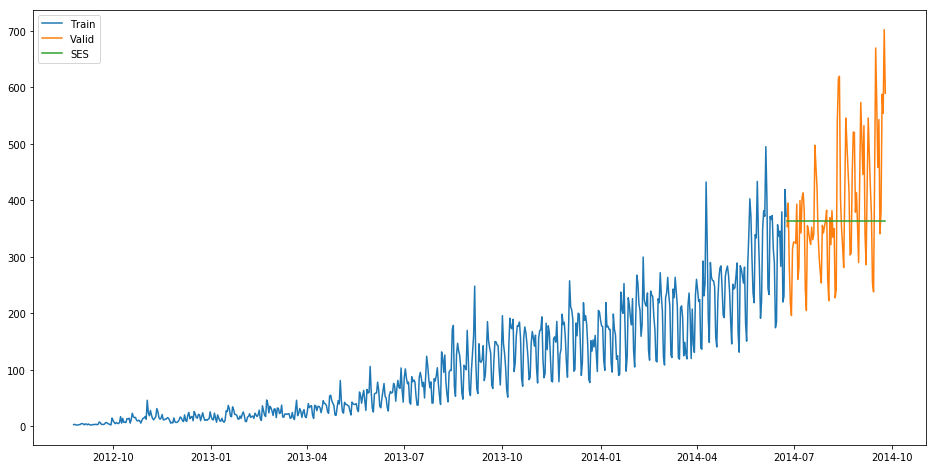

In [140]:
y_hat_avg = valid.copy() 
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

In [141]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES)) 
print(rms)

113.43708111884514


### Holt’s Linear Trend Model

In [142]:
# It is an extension of simple exponential smoothing to allow forecasting of data with a trend.
# This method takes into account the trend of the dataset. 
# The forecast function in this method is a function of level and trend.

In [143]:
# We can decompose the time series in four parts.

# Observed, which is the original time series.
# Trend, which shows the trend in the time series, i.e., increasing or decreasing behaviour of the time series.
# Seasonal, which tells us about the seasonality in the time series.
# Residual, which is obtained by removing any trend or seasonality in the time series.

In [148]:
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(Train.Count).plot() 
result = sm.tsa.stattools.adfuller(train.Count) 
plt.show()

ImportError: cannot import name 'factorial' from 'scipy.misc' (C:\Users\S V V S KISHORE\AppData\Roaming\Python\Python37\site-packages\scipy\misc\__init__.py)

In [144]:
y_hat_avg = valid.copy() 
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

ValueError: attempt to get argmin of an empty sequence

### Holt winter’s model on daily time series

In [145]:
# Datasets which show a similar set of pattern after fixed intervals of a time period suffer from seasonality.
# The above mentioned models don’t take into account the seasonality of the dataset while forecasting. 
# Hence we need a method that takes into account both trend and seasonality to forecast future prices.
# One such algorithm that we can use in such a scenario is Holt’s Winter method. 
# The idea behind Holt’s Winter is to apply exponential smoothing to the seasonal components in addition to level and trend.

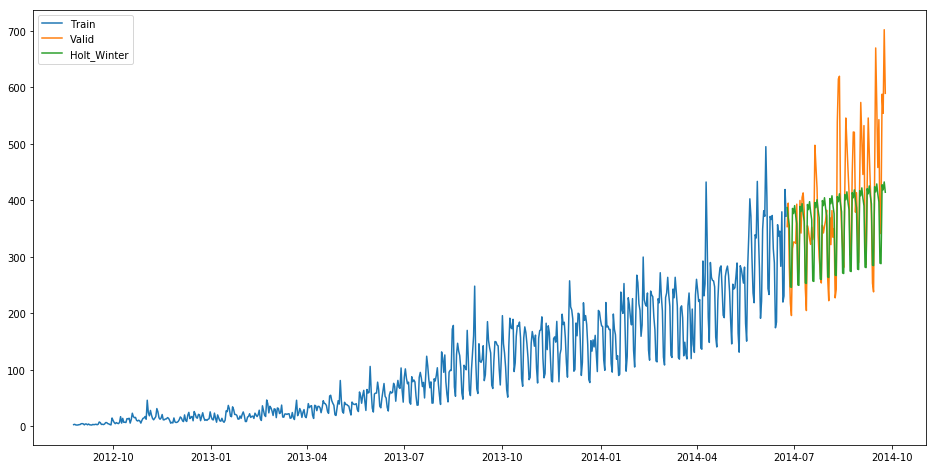

In [146]:
y_hat_avg = valid.copy() 
fit1 = ExponentialSmoothing(np.asarray(Train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit() 
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot( Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best') 
plt.show()

In [147]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter)) 
print(rms)

82.37900996094073


### Introduction to ARIMA model

In [ ]:
# ARIMA stands for Auto Regression Integrated Moving Average. It is specified by three ordered parameters (p,d,q).
# Here p is the order of the autoregressive model(number of time lags)
# d is the degree of differencing(number of times the data have had past values subtracted)
# q is the order of moving average model. We will discuss more about these parameters in next section.

In [ ]:
# The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation.

### What is a stationary time series?

There are three basic criterion for a series to be classified as stationary series :

- The mean of the time series should not be a function of time. It should be constant.
- The variance of the time series should not be a function of time.
- THe covariance of the ith term and the (i+m)th term should not be a function of time.

### Why do we have to make the time series stationary?
- We make the series stationary to make the variables independent. Variables can be dependent in various ways, but can only be independent in one way. 
- So, we will get more information when they are independent. Hence the time series must be stationary.
- If the time series is not stationary, firstly we have to make it stationary. For doing so, we need to remove the trend and seasonality from the data. 

### Stationarity Check
- We use Dickey Fuller test to check the stationarity of the series.
- The intuition behind this test is that it determines how strongly a time series is defined by a trend.
- The null hypothesis of the test is that time series is not stationary (has some time-dependent structure).
- The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.
- If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [151]:
from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeseries):
        #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=24).mean()

    rolstd = pd.Series(timeseries).rolling(window=24).std()
        #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

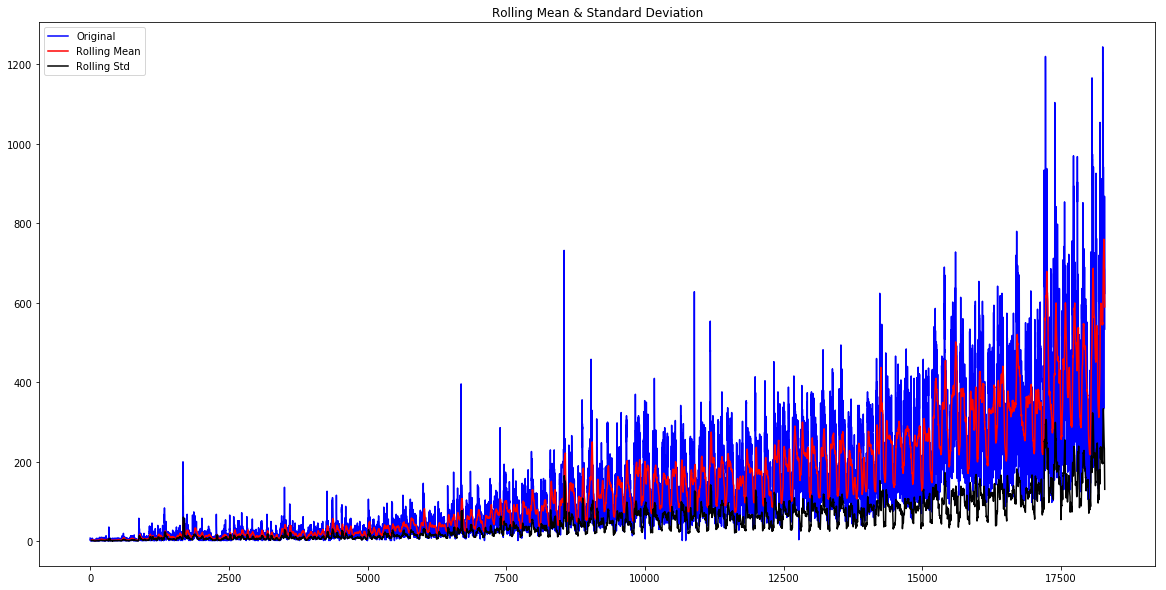

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [152]:
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10
test_stationarity(train_original['Count'])

### Removing trend

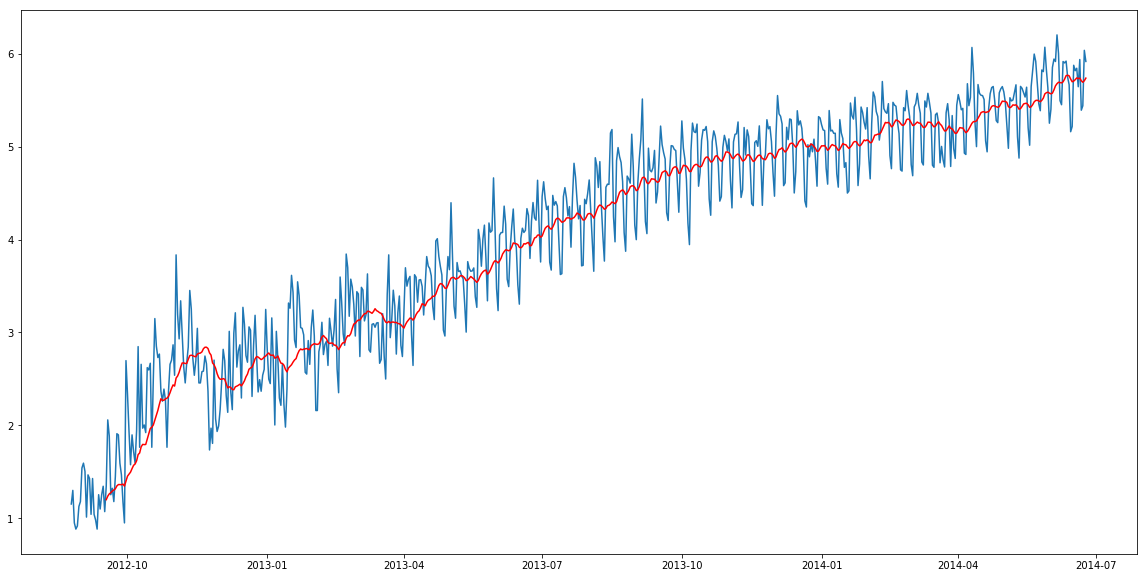

In [155]:
Train_log = np.log(Train['Count']) 
valid_log = np.log(valid['Count'])
# moving_avg = pd.rolling_mean(Train_log, 24)
moving_avg = Train_log.rolling(24).mean()
# moving_avg = ts_log.rolling(12).mean()
# rolmean = pd.Series(timeseries).rolling(window=24).mean()
plt.plot(Train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

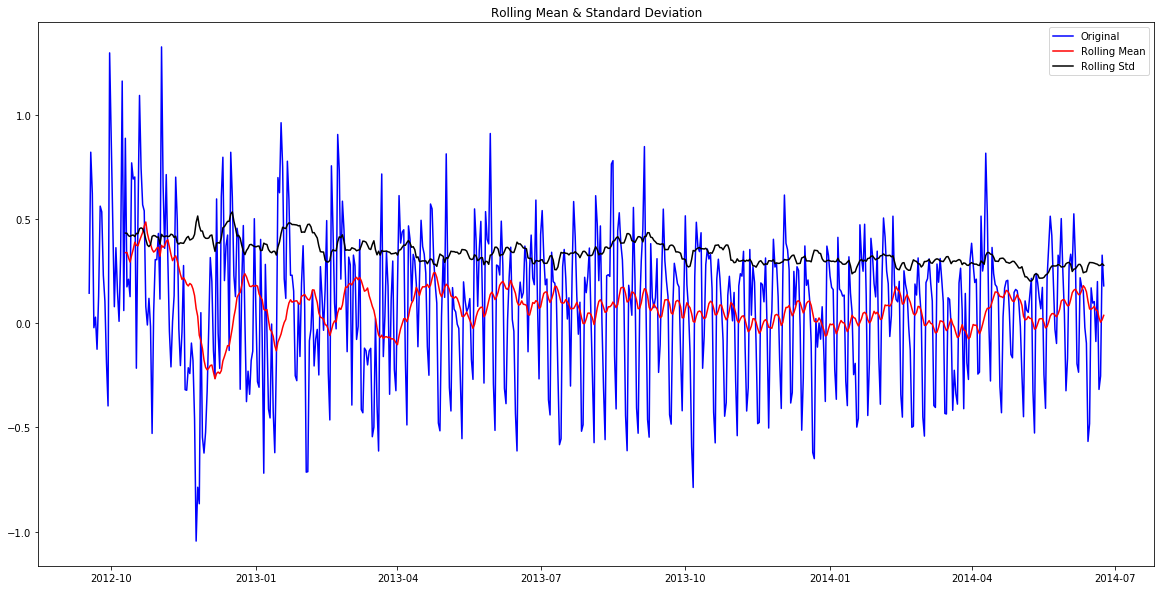

Results of Dickey-Fuller Test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [157]:
# we can observe an increasing trend. Now we will remove this increasing trend to make our time series stationary.
train_log_moving_avg_diff = Train_log - moving_avg

# Since we took the average of 24 values, rolling mean is not defined for the first 23 values. So let’s drop those null values.
train_log_moving_avg_diff.dropna(inplace = True) 
test_stationarity(train_log_moving_avg_diff)

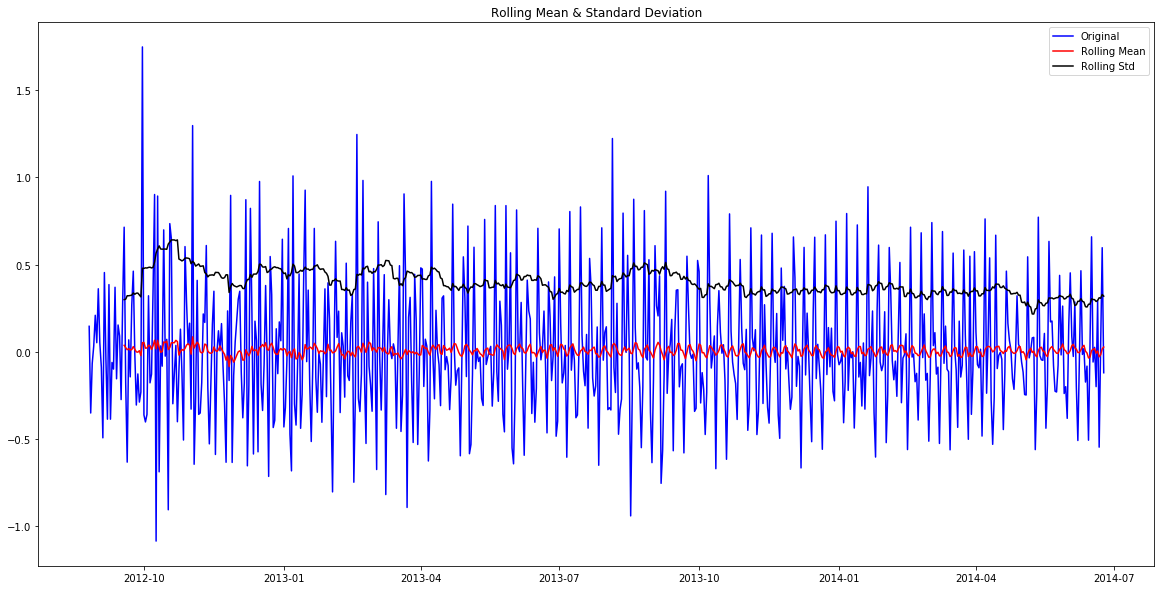

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [158]:
# We can see that the Test Statistic is very smaller as compared to the Critical Value. So, we can be confident that the trend is almost removed.

# Let’s now stabilize the mean of the time series which is also a requirement for a stationary time series.

# Differencing can help to make the series stable and eliminate the trend.
train_log_diff = Train_log - Train_log.shift(1) 
test_stationarity(train_log_diff.dropna())